In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


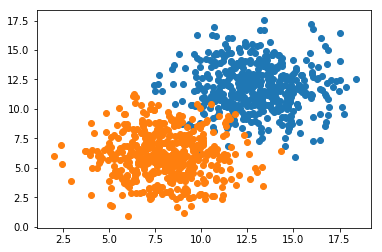

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])


In [3]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid'))
adam=Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50,epochs=500,shuffle='true')

Epoch 1/500
1000/1000 [==============================] - 0s 225us/step - loss: 1.4261 - acc: 0.5590
Epoch 2/500
1000/1000 [==============================] - 0s 42us/step - loss: 0.6265 - acc: 0.6050
Epoch 3/500
1000/1000 [==============================] - 0s 51us/step - loss: 0.4454 - acc: 0.8290
Epoch 4/500
1000/1000 [==============================] - 0s 52us/step - loss: 0.3839 - acc: 0.8950
Epoch 5/500
1000/1000 [==============================] - 0s 46us/step - loss: 0.3408 - acc: 0.9040
Epoch 6/500
1000/1000 [==============================] - 0s 48us/step - loss: 0.3079 - acc: 0.9270
Epoch 7/500
1000/1000 [==============================] - 0s 48us/step - loss: 0.2886 - acc: 0.9320
Epoch 8/500
1000/1000 [==============================] - 0s 48us/step - loss: 0.2611 - acc: 0.9390
Epoch 9/500
1000/1000 [==============================] - 0s 42us/step - loss: 0.2347 - acc: 0.9580
Epoch 10/500
1000/1000 [==============================] - 0s 46us/step - loss: 0.2191 - acc: 0.9630
Epoch 11

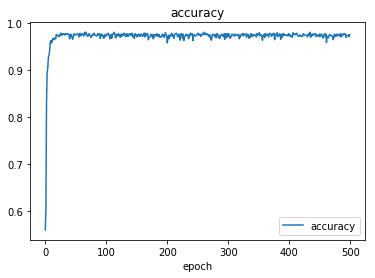

In [4]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

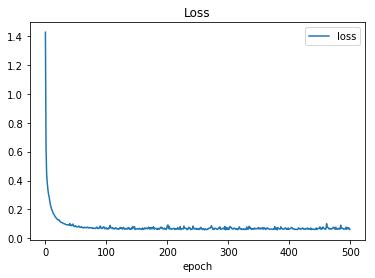

In [5]:
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [6]:
def plot_descision_boundry(X, y, model):
    x_span= np.linspace(min(X[:,0])-1, max(X[:,0])+1,50)
    y_span=np.linspace(min(X[:,1])-1,max(X[:,1])+1,50)
    xx,yy=np.meshgrid(x_span,y_span)
    xx_,yy_=xx.ravel(),yy.ravel()
    grid=np.c_[xx_,yy_]
    pred_func=model.predict(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

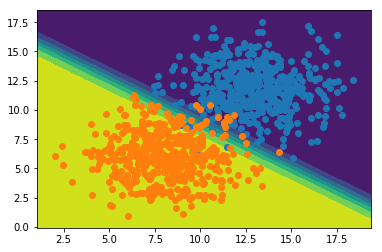

In [7]:
plot_descision_boundry(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

[[1.00560095e-10]]


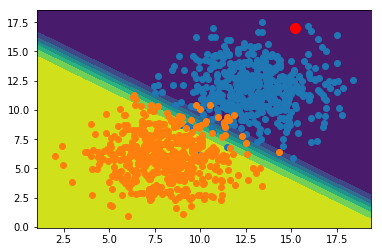

In [8]:
plot_descision_boundry(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x=15.2
y=17
point=np.array([[x,y]])
prediction=model.predict(point)
plt.plot([x],[y],marker='o',markersize=10,color='red')
print(prediction)